#6.4 Supervised Machine Learning

Content:
- Task 2 import libraries
- Task 3 import and clean dataset
- Task 4 explore the data visually through a scatterplot
- Task 5 hypothesis to be tested
- Task 6 reshape the variables into NumPy arrays
- Task 7 split the data into a training set and a test set
- Task 8 run a linear regression on the data
- Task 9 create a plot that shows the regression line on the test set
- Task 10 write the interpretation of how well the line appears to fit the data
- Task 11 check the model performance statistics
- Task 12 compare the predicted y values with the actual y values in a dataframe
- Task 13 include your thoughts on how well the model performed on the test

Task 2 - Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Task 3 - Import and clean Dataset

In [2]:
#set path
path=r'C:\Users\EliteMini HX90\OneDrive\Documents\CareerFoundry\Achievement_6'

In [3]:
#import dataset
df=pd.read_pickle(os.path.join(path,'02_Data','02_Prepared_Data','trending_yt_videos_reduced_clean.pkl'))

In [4]:
df.shape

(197757, 15)

In [5]:
df.head()

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,video_id,channel_id,video_tags,publish_date,language
0,"Freeman HKD, Nox, Tyfah Guni - Man To Man (Off...",FreemanHKDVEVO,1,0,0,2023-11-29,ZW,659445,12525,1154,nOjbJdw2dPs,UCBqFAZ41zHq5h5-7A1YpiuQ,"Freeman, HKD, Nox, Tyfah, Guni, Man, (Official...",2023-11-02 00:00:00+00:00,nan
1,Nutty O - Jericho ft. BLING4 & Bagga,NuttyOVEVO,2,0,48,2023-11-29,ZW,96852,6361,795,7g71VmQzyD4,UCwY1uVRu0ML4wWBm9pGZy_g,"Jericho, BLING4, Bagga, Ragga-Soca, reggae, po...",2023-11-23 00:00:00+00:00,nan
2,"Kamo Mphela, Khalil Harrison & Tyler ICU - Dal...",Kamo Mphelaxx,3,0,47,2023-11-29,ZW,1236824,41518,1290,hcqcy6cdCw8,UCfYbXQVQZYoISJzqBdH15Eg,"kamo mphela, tyler icu, dalie, Mnike, Amapiano...",2023-11-22 00:00:00+00:00,nan
3,Garnacho UNBELIEVABLE Overhead Kick! 🤩 | Evert...,Manchester United,4,1,46,2023-11-29,ZW,6607439,153575,5580,qgmhQZzoy1s,UC6yW44UGJJBvYTlfC7CRg2Q,"manchester united, mufc, man utd, manutd, mu, ...",2023-11-26 00:00:00+00:00,en-GB
4,Drake - First Person Shooter ft. J. Cole,DrakeVEVO,5,-1,-3,2023-11-29,ZW,19193308,858667,36413,Xty2gi5cMa8,UCQznUf1SjfDqx65hX3zRDiA,"Drake, First, Person, Shooter, OVO/Republic, H...",2023-11-15 00:00:00+00:00,en


In [6]:
df.describe()

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count
count,197757.000000,197757.000000,197757.000000,1.977570e+05,1.977570e+05,197757.000000
mean,25.500771,3.369292,19.905141,8.681297e+06,3.066996e+05,8041.094834
std,14.431243,19.823211,19.247727,1.851627e+07,7.169108e+05,32774.369653
min,1.000000,-49.000000,-49.000000,0.000000e+00,0.000000e+00,0.000000
25%,13.000000,-9.000000,7.000000,3.580290e+05,1.132800e+04,390.000000
50%,26.000000,-1.000000,21.000000,1.269470e+06,4.472300e+04,1193.000000
75%,38.000000,15.000000,35.000000,6.643707e+06,2.468800e+05,3855.000000
max,50.000000,49.000000,49.000000,2.335466e+08,1.576806e+07,954336.000000


In [7]:
# calculate IQR for column view_count
Q1 = df['view_count'].quantile(0.25)
Q3 = df['view_count'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 2
outliers_1 = df[(df['view_count'] < Q1 - threshold * IQR) | (df['view_count'] > Q3 + threshold * IQR)]

In [8]:
outliers_1.shape

(26970, 15)

In [9]:
# calculate IQR for column like_count
Q1 = df['like_count'].quantile(0.25)
Q3 = df['like_count'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 2
outliers_2 = df[(df['like_count'] < Q1 - threshold * IQR) | (df['like_count'] > Q3 + threshold * IQR)]

In [10]:
outliers_2.shape

(24228, 15)

In [11]:
# calculate IQR for column comment_count
Q1 = df['comment_count'].quantile(0.25)
Q3 = df['comment_count'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 2
outliers_3 = df[(df['comment_count'] < Q1 - threshold * IQR) | (df['comment_count'] > Q3 + threshold * IQR)]

In [12]:
outliers_3.shape

(21673, 15)

The large amount of outliers and our earlier understanding of the data suggests that these cannot be eliminated without hurting the analysis, being part of what contributes to the richness of the dataset. 

Task 4 - Explore the Data Visually

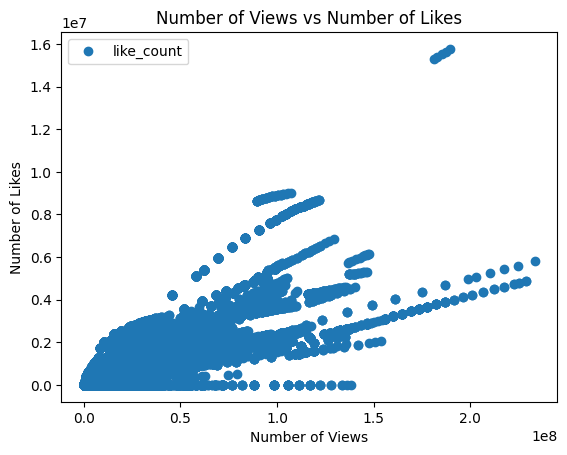

In [13]:
#create scatterplot of view_count and like_count
df.plot(x = 'view_count', y='like_count',style='o')
plt.title('Number of Views vs Number of Likes')  
plt.xlabel('Number of Views')  
plt.ylabel('Number of Likes')  
plt.show()

Task 5 - State your Hypothesis

Hypothesis: The more views a video gets, the more likes it also receives. As the value of view_count increases, so does the value of like_count.

Task 6 - reshape the variables into NumPys arrays

In [14]:
#reshape the variables we need into numpy arrays and put them into separate objects
X=df['view_count'].values.reshape(-1,1)
y=df['like_count'].values.reshape(-1,1)

In [15]:
X

array([[ 659445],
       [  96852],
       [1236824],
       ...,
       [2076478],
       [1190917],
       [1206689]], dtype=int64)

In [16]:
y

array([[ 12525],
       [  6361],
       [ 41518],
       ...,
       [197026],
       [ 88558],
       [ 15521]], dtype=int64)

Task 7 - Split the data into two sets: a training set and a test set

In [17]:
#split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

Task 8 - Run a linear regression on the data

In [18]:
#create a regression object
regression = LinearRegression()

In [19]:
#fit the regression to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
#predict the values of y using X
y_predicted=regression.predict(X_test)

Task 9 - Create a plot that shows the regression line on the test set

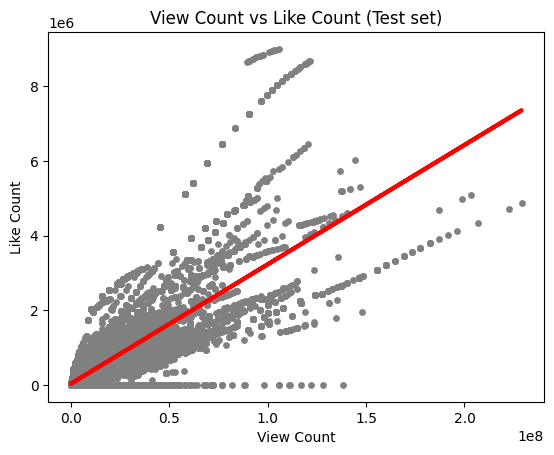

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('View Count vs Like Count (Test set)')
plot_test.xlabel('View Count')
plot_test.ylabel('Like Count')
plot_test.show()

Task 10 - Interpretation of how well the line appears to fit the data

The line does not perfectly align with all points, with some observations having a very high number of likes despite having an average number of views and the opposite also being observed. It does not seem to fit the data particularly well.

Task 11 - Check the model performance statistics

In [22]:
#create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [23]:
#print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03199404]]
Mean squared error:  160791564472.7313
R2 score:  0.6855644583231639


Since the mean squared error is extremely large and the R2 score is not particularly high, this means the model is not a good fit.

Task 12 - Compare the predicted y values with the actual y values in a dataframe

In [24]:
#crate df comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25503,5.799299e+04
1,1088,3.058578e+04
2,661,3.298741e+04
3,8634,3.807776e+04
4,81939,1.724955e+05
5,11930,4.055474e+04
6,541886,9.675248e+05
7,8042313,3.383802e+06
8,268599,2.245124e+05
9,3647,3.446794e+04


Task 13 - Include your thoughts on how well the model performed on the test set

The values are almost unbelievably far from each other. The model has not performed well. My observation of the scatterplot and with the insight of all the metrics makes me think that the number of likes may grow at a higher rate for videos with average or below average number of views, while videos with a larger number of views have a more unexpected behaviour when it comes to number of likes, making the data unsuitable for making predictions since the relationship does not follow a simple, single and straight regression line.

While the removel of outliers will have an impact on the validity of our analysis, it is worth to eliminate some extreme values from like_count to see if the regression model would perform better when only considering the more common patterns.

In [25]:
# calculate IQR for column like_count
Q1 = df['like_count'].quantile(0.25)
Q3 = df['like_count'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

235552.0


In [26]:
threshold = 2
print(Q3 + threshold * IQR)

717984.0


In [27]:
#clean extreme values from the like_count variable
df_test = df[df['like_count'] <=700000] 

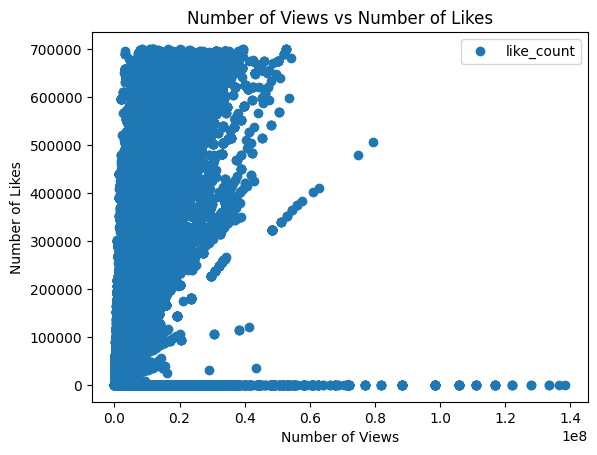

In [28]:
#replot the scatterplot without outliers

df_test.plot(x = 'view_count', y='like_count', style='o')  
plt.title('Number of Views vs Number of Likes')  
plt.xlabel('Number of Views')  
plt.ylabel('Number of Likes')  
plt.show()

In [29]:
#reshape again for df without outliers

X_2 = df_test['view_count'].values.reshape(-1,1)
y_2 = df_test['like_count'].values.reshape(-1,1)

In [30]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [31]:
#run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [32]:
# Predict

y_predicted_2 = regression.predict(X_test_2)

In [33]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01474632]]
Mean squared error:  13826297501.855669
R2 score:  0.39062906501200567


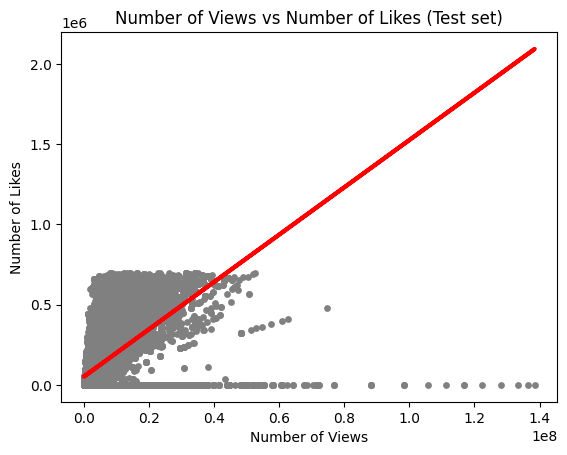

In [35]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Number of Views vs Number of Likes (Test set)')
plot_test.xlabel('Number of Views')
plot_test.ylabel('Number of Likes')
plot_test.show()

In [36]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,330338,106465.198647
1,64676,62181.897516
2,587575,175700.136220
3,116584,131349.680327
4,4285,52992.622143
5,138911,81237.569995
6,4711,52590.622589
7,6698,54199.210657
8,492668,193988.365730
9,2140,54125.788707
